In [1]:
from utils import Passenger, Group, RechargePoint, Depot, Vehicle
from instance_generator import InstanceGenerator

generator = InstanceGenerator(
    n_passengers=1,
    n_vehicles=2,
    n_recharges=1,
    n_depots=1,
    area_lat=(-23.70, -23.40),
    area_lon=(-46.80, -46.40),
    seed=42,
)

passengers, vehicles, recharges, depots = generator.create()
num_vehicles = len(vehicles)

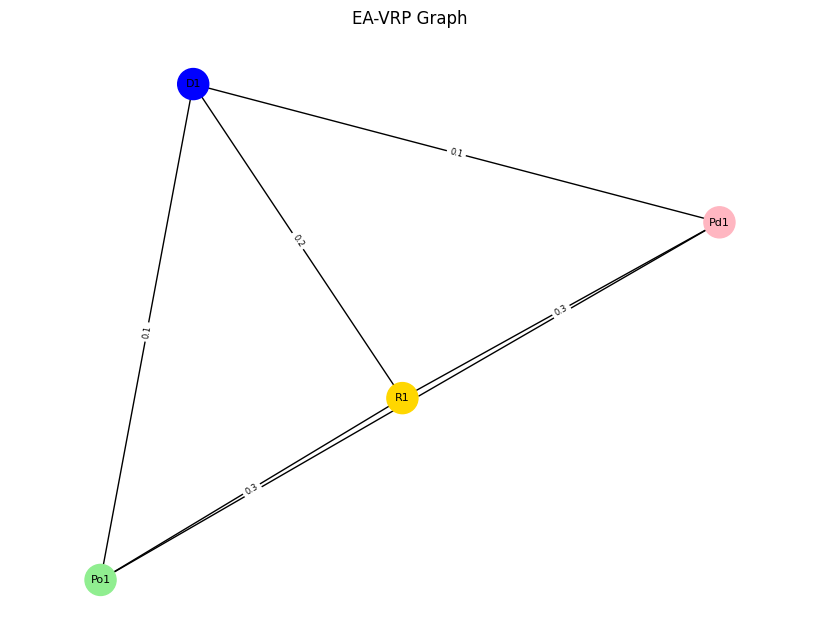

In [2]:
from graphs import GraphBuilder

builder = GraphBuilder(passengers, None, depots, recharges)
G = builder.build()
builder.draw()

In [3]:
from encoder import Encoder
from constraints import TaxiConstraints

penalties_params={
    "assignment": 10.0, 
    "flow": 10.0, 
    "capacity": 5.0,}

constraints = TaxiConstraints(penalty_params=penalties_params)
encoder = Encoder(graph=G, 
                  num_vehicles=num_vehicles, 
                  penalty_params=penalties_params, 
                  constraints_handler=constraints)

Q, c, offset, var_index = encoder.encode()

24


In [4]:
print(f"{Q}\n{c}\n{offset}\n{var_index}")

[[ 0.  0.  0.  0.  0.  0.  0. 10.  0.  0. 10.  0. 10.  0.  0.  0.  0.  0.
   0. 10.  0.  0. 10.  0.]
 [ 0.  0.  0.  0. 10.  0.  0.  0.  0.  0.  0. 10.  0. 10.  0.  0. 10.  0.
   0.  0.  0.  0.  0. 10.]
 [ 0.  0.  0.  0.  0. 10.  0.  0. 10.  0.  0.  0.  0.  0. 10.  0.  0. 10.
   0.  0. 10.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. 10.  0.  0. 10.  0.  0.  0.  0.  0. 10.  0.  0.
  10.  0.  0. 10.  0.  0.]
 [ 0. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0. 10.  0. 10.  0.  0. 10.  0.
   0.  0.  0.  0.  0. 10.]
 [ 0.  0. 10.  0.  0.  0.  0.  0. 10.  0.  0.  0.  0.  0. 10.  0.  0. 10.
   0.  0. 10.  0.  0.  0.]
 [ 0.  0.  0. 10.  0.  0.  0.  0.  0. 10.  0.  0.  0.  0.  0. 10.  0.  0.
  10.  0.  0. 10.  0.  0.]
 [10.  0.  0.  0.  0.  0.  0.  0.  0.  0. 10.  0. 10.  0.  0.  0.  0.  0.
   0. 10.  0.  0. 10.  0.]
 [ 0.  0. 10.  0.  0. 10.  0.  0.  0.  0.  0.  0.  0.  0. 10.  0.  0. 10.
   0.  0. 10.  0.  0.  0.]
 [ 0.  0.  0. 10.  0.  0. 10.  0.  0.  0.  0.  0.  0.  0.  0. 10.  0.  0.
  10.  0.  0. 10.